In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
#from sklearn.externals import joblib
import joblib
from sklearn.preprocessing import RobustScaler
import csv
import datetime
from sklearn.svm import SVR
import sklearn.svm as svm
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor



traindata


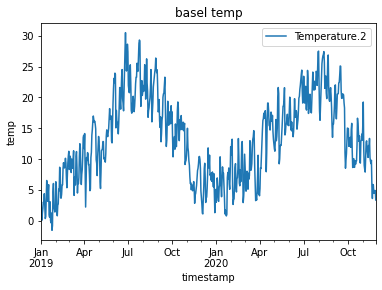

In [9]:
# read dataset
import matplotlib.pyplot as plt
dataset = 'basel_daily.csv'
df  = pd.read_csv(dataset, skiprows=9)
# oluşturduğu değişiklikler şunlar 20201126T0000 -> 2019-01-01
df['timestamp'] = df['timestamp'].str.replace('T0000', '')
df.timestamp = pd.to_datetime(df.timestamp, format='%Y%m%d', errors='coerce')

# trying to plot
df.plot(x = 'timestamp', y = 'Temperature.2', style = '-')
plt.title('basel temp')
plt.xlabel('timestamp')
plt.ylabel('temp')
plt.show()


In [2]:
#dataset from
#'https://www.meteoblue.com/en/weather/archive/export/basel_switzerland_2661604?daterange=2019-01-01%20to%202020-11-28&domain=NEMSAUTO&params%5B%5D=temp2m&params%5B%5D=relhum2m&params%5B%5D=wind%2Bdir10m&min=2019-01-01&max=2020-11-28&utc_offset=0&timeResolution=daily&temperatureunit=CELSIUS&velocityunit=KILOMETER_PER_HOUR&energyunit=watts&lengthunit=metric'

In [3]:
def train_data():
    # read dataset
    dataset = 'basel_daily.csv'
    df  = pd.read_csv(dataset, skiprows=9)


    print('traindata')
    # oluşturduğu değişiklikler şunlar 20201126T0000 -> 2019-01-01
    df['timestamp'] = df['timestamp'].str.replace('T0000', '')
    df.timestamp = pd.to_datetime(df.timestamp, format='%Y%m%d', errors='coerce')

    # kullanmak istemediğimiz sutünları sil
    df = df.drop(columns=['Temperature', 'Temperature.1', 'Relative Humidity.1', 'Wind Speed.1'])
    X = df
    
    # x -> direk df olacak (kullanmaya hazır hale getirildikten sonra)
    # y -> prediction yaparken seçeceğimiz sütun
    y = X['Temperature.2']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5,
                                                    random_state = 123)


    scaler = preprocessing.StandardScaler().fit(X_train)
    X_train_scaled = scaler.transform(X_train)

    pipeline = make_pipeline(preprocessing.StandardScaler(),
                        RandomForestRegressor(n_estimator=100))

    hyperparameters = { 'randomforestregressor__max_features' : ['auto', 'sqrt', 'log2'],
                'randomforestregressor__max_depth' : [None, 5,3,1], }


    clf = LinearRegression()
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    print(r2_score(y_test, pred))
    print(mean_squared_error(y_test, pred))
    joblib.dump(clf, 'weather_predictor.pkl')

train_data()

traindata


TypeError: invalid type promotion

In [ ]:
def get_the_weather(date):
    weather = df.timestamp
    temp = df['Temperature.2']

    for i in range(0, len(weather)):
        if day == date:
            return temp[i]


def predict_weather():
    clf = joblib.load('weather_predictor.pkl')
    print('-'*48)
    print('Tahmin de bulunmak istediğiniz gün ile ilgili detayları giriniz: ')
    print('\n')

    year = input('YIL: ')
    month = input('AY: ')
    theday = input('DAY: ')

    day = str(year) + "-" + str(month) + "-" + str(theday)
    day = datetime.datetime.strptime(day, '%Y-%m-%d')
    date = (day - datetime.datetime(1970,1,1)).total_seconds()

    day_x = str(year) + "-" + str(month) + "-" + str(theday+1)
    day_x = datetime.datetime.strptime(day_x, '%Y-%m-%d')
    date_x = (day_x - datetime.datetime(1970,1,1)).total_seconds()

    X = [[date, date_x]]
    print('\n')
    print('-'*48)
    print('Tahmin edilen sıcaklık: ' + str(clf.predict(X)[0]))
    print('Aslında sıcaklık: ' + str(get_the_weather(day)))
    print('-'*48)
    print('\n')

In [ ]:
def run_menu():
    print("*" *48)
    print("-" *10 + " What would you like to do? " + "-" *10)
    print("\n")
    print("1. Look up the weather on a specific day")
    print("2. Predict the weather on a specific day")
    print("\n")

    option = input("Enter option: ")

    while True:
        if option == 2 or option == 1 or option == 9:
            break
        option = input("Enter option: ")
    return option

In [ ]:
def run_program(option):
    if option == 1:
        print("1")
    elif option == 2:
        predict_weather()


In [ ]:

train_data()

while True:
    option = run_menu()
    if option == 9:
        break
    else:
        run_program(option)
